# Team 3 - NBA Players

![](https://img.bleacherreport.net/img/slides/photos/004/352/533/9a7a86881bcb8b4c45edb9c3506a22fe_crop_exact.jpg?h=533&w=800&q=70&crop_x=center&crop_y=top)

_For more information about the dataset, read [here](https://www.kaggle.com/drgilermo/nba-players-stats)._

## Your tasks
- Name your team!
- Read the source and do some quick research to understand more about the dataset and its topic
- Clean the data
- Perform Exploratory Data Analysis on the dataset
- Analyze the data more deeply and extract insights

## Submission Guide
- Create a Github repository for your project
- Upload the dataset (.csv file) and the Jupyter Notebook to your Github repository.
- Submit your works through Google Form (Link to be provided later)

## Tips for Data Cleaning, Manipulation & Visualization
- Here are some of our tips for Data Cleaning, Manipulation & Visualization. [Click here](https://hackmd.io/cBNV7E6TT2WMliQC-GTw1A)

In [0]:
# Start your codes here!
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D
import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')

In [2]:
from google.colab import drive 
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# Read seasons dataset
seasons = pd.read_csv('/content/gdrive/My Drive/FTMLE - Tonga/Week_3/assignments/datasets/03-nba-players/seasons.csv')

In [0]:
# Read player dataset 

players = pd.read_csv('/content/gdrive/My Drive/FTMLE - Tonga/Week_3/assignments/datasets/03-nba-players/players.csv')

###  Cleaning dataset : Players

In [5]:
# Have an overview of the dataset
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4550 entries, 0 to 4549
Data columns (total 8 columns):
name          4550 non-null object
year_start    4550 non-null int64
year_end      4550 non-null int64
position      4549 non-null object
height        4549 non-null object
weight        4544 non-null float64
birth_date    4519 non-null object
college       4248 non-null object
dtypes: float64(1), int64(2), object(5)
memory usage: 284.5+ KB


In [6]:
# Show first 5 rows
players.head()

,name,year_start,year_end,position,height,weight,birth_date,college
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles"
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University


### Handle missing data  for Players dataset

In [79]:
# Check for NaN values
players.isnull().sum()

name          0
year_start    0
year_end      0
position      0
height        0
weight        0
birth_date    0
college       0
dtype: int64

In [0]:
#Drop missing values of Weight
players.drop(players[players['weight'].isnull()].index,axis= 0, inplace = True)

In [0]:
#Drop missing values of  Height
players.drop(players[players['height'].isnull()].index,axis= 0, inplace = True)

In [0]:
#Drop missing values of  Position
players.drop(players[players['position'].isnull()].index,axis= 0, inplace = True)

In [0]:
#Drop missing values of Birthday
players.drop(players[players['birth_date'].isnull()].index,axis= 0, inplace = True)

#### Handle errors

In [0]:
#strip blank and * from string columns
players['name'] = players['name'].str.strip()
players['position'] = players['position'].str.strip()
players['birth_date'] = players['birth_date'].str.strip()
players['college'] = players['college'].str.strip()
players['name'] = players['name'].str.strip('*')
players['position'] = players['position'].str.strip('*')
players['birth_date'] = players['birth_date'].str.strip('*')
players['college'] = players['college'].str.strip('*')

In [0]:
# NaN at college column replaced by 'Not Attend College or University'
players['college'].fillna('Not Attend College or University', inplace = True)

## Cleaning seasons dataset

In [78]:
#Have an overview of the dataset
seasons.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10432 entries, 5727 to 24687
Data columns (total 22 columns):
Year      10432 non-null int64
Player    10432 non-null object
Pos       10432 non-null object
Age       10432 non-null int64
Tm        10432 non-null object
G         10432 non-null int64
MP        10432 non-null int64
PER       10432 non-null float64
TS%       10432 non-null float64
ORB%      10432 non-null float64
DRB%      10432 non-null float64
AST%      10432 non-null float64
STL%      10432 non-null float64
BLK%      10432 non-null float64
TOV%      10432 non-null float64
FG%       10432 non-null float64
3P%       10432 non-null float64
2P%       10432 non-null float64
eFG%      10432 non-null float64
FT%       10432 non-null float64
PF        10432 non-null float64
PTS       10432 non-null int64
dtypes: float64(14), int64(5), object(3)
memory usage: 1.8+ MB


In [16]:
seasons.sample(5)

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,blanl,OWS,DWS,WS,WS/48,blank2,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
19114,19114,2008.0,Nazr Mohammed,C,30.0,TOT,82.0,29.0,1650.0,15.8,0.533,0.002,0.309,13.5,21.1,17.3,7.6,1.4,2.8,14.4,19.5,NaN,1.3,2.0,3.4,0.098,NaN,-1.6,0.7,-0.9,0.5,272.0,528.0,0.515,0.0,1.0,0.000,272.0,527.0,0.516,0.515,95.0,163.0,0.583,194.0,300.0,494.0,72.0,45.0,60.0,101.0,230.0,639.0
23750,23750,2016.0,Kirk Hinrich,PG,35.0,CHI,35.0,7.0,555.0,7.3,0.528,0.475,0.136,1.4,9.5,5.5,15.0,1.2,0.1,17.8,12.0,NaN,0.2,0.4,0.6,0.048,NaN,-2.2,-1.3,-3.5,-0.2,47.0,118.0,0.398,23.0,56.0,0.411,24.0,62.0,0.387,0.496,15.0,16.0,0.938,7.0,51.0,58.0,59.0,13.0,1.0,27.0,63.0,132.0
17472,17472,2005.0,Scott Padgett,PF,28.0,HOU,66.0,0.0,942.0,12.3,0.549,0.541,0.172,6.0,16.7,11.5,9.5,1.9,0.8,10.7,14.0,NaN,1.2,1.6,2.8,0.141,NaN,0.1,1.4,1.5,0.8,98.0,233.0,0.421,50.0,126.0,0.397,48.0,107.0,0.449,0.528,29.0,40.0,0.725,47.0,138.0,185.0,55.0,33.0,10.0,30.0,119.0,275.0
12005,12005,1995.0,Jack Haley,PF,31.0,SAS,31.0,0.0,117.0,11.9,0.486,0.016,0.525,8.1,17.5,13.1,2.9,1.3,3.0,14.8,33.1,NaN,-0.2,0.2,0.0,0.010,NaN,-7.6,-3.3,-10.9,-0.3,26.0,61.0,0.426,0.0,1.0,0.000,26.0,60.0,0.433,0.426,21.0,32.0,0.656,8.0,19.0,27.0,2.0,3.0,5.0,13.0,31.0,73.0
24140,24140,2017.0,Marco Belinelli,SG,30.0,CHO,74.0,0.0,1778.0,13.3,0.566,0.460,0.273,0.9,10.2,5.5,13.1,1.2,0.4,9.2,19.2,NaN,2.0,1.2,3.2,0.088,NaN,0.1,-2.0,-1.9,0.1,264.0,615.0,0.429,102.0,283.0,0.360,162.0,332.0,0.488,0.512,150.0,168.0,0.893,14.0,164.0,178.0,147.0,44.0,9.0,70.0,90.0,780.0


In [0]:
# Drop blanl and blank2 , Unnamed: 0 column with no values
seasons.drop(columns=['blank2','blanl','Unnamed: 0'],inplace= True)
# Drop these unnecessary columns since the data is not needed to analyzed player
seasons.drop(columns = ['ORB','TRB%','USG%','DRB','TRB', 'AST',	'STL',	'BLK',	'TOV','3PAr','FTr','GS','OWS', 'DWS', 'WS', 'WS/48',	'OBPM',	'DBPM','BPM','VORP', '3P',	'3PA',	'2P', '2PA',	'FG',	'FGA', 'FT', 'FTA'], inplace = True) 

In [0]:
#drop NULL in Year
seasons.drop(seasons[seasons['Year'].isnull()].index, axis = 0, inplace = True)
# switch Year to int
seasons['Year'] = seasons['Year'].astype(int)

#### Limit the period of time and the total games to analyize
- The data quality is higher in this period 1980 - 2017 .The way basketball was played in the 50s - 70s is not similar to today it holds little information that will not help analyzing.

- There are 82 games/season at NBA. Take the players played over 50 games which make sure the player played at least $2/3$ of total games of the season.

In [0]:
# Drop 1950s-1979
seasons.drop(seasons[seasons['Year'] < 1980].index,inplace = True)

In [0]:
# Take players that only play more than 50 games. 
seasons = seasons[seasons['G'] >= 50]

#### Handle errors

In [0]:
#percentage isn't correct in this columns so we multiply it by 100
seasons['FG%'] = seasons['FG%'] * 100 
seasons['3P%'] = seasons['3P%'] * 100 
seasons['2P%'] = seasons['2P%'] * 100
seasons['FT%'] = seasons['FT%'] * 100
seasons['eFG%'] = seasons['eFG%'] * 100
seasons['TS%'] = seasons['TS%'] * 100

In [0]:
# Remove blank and * from player information
seasons['Player'] = seasons['Player'].str.strip()
seasons['Player'] = seasons['Player'].str.strip('*')

In [0]:
# switch Gameplay, Point, Minute Played to integer
seasons = seasons.astype({"PTS":"int64", "MP":"int64","G": "int64", "Year": "int64","Age": "int64"}) 

In [0]:
#fill the rest of the NULL with 0
seasons.fillna(0, inplace = True) 

### Filter the best players by PER Player efficiency rating
PER largely measures offensive performance.  PER average, every season, is 15.00. We pick the ones having PER > 30 to make sure they are best players

In [0]:
 # The best player have the PER ( measures offensive performance ) higher than 30
best_player = seasons[seasons['PER'] > 30]

In [26]:
best_player

,Year,Player,Pos,Age,Tm,G,MP,PER,TS%,ORB%,DRB%,AST%,STL%,BLK%,TOV%,FG%,3P%,2P%,eFG%,FT%,PF,PTS
8869,1988,Michael Jordan,SG,24,CHI,82,3311,31.7,60.3,4.8,10.7,27.0,3.9,2.4,9.6,53.5,13.2,54.6,53.7,84.1,270.0,2868
9297,1989,Michael Jordan,SG,25,CHI,81,3255,31.1,61.4,5.5,17.3,34.7,3.6,1.2,11.9,53.8,27.6,55.3,54.6,85.0,247.0,2633
9747,1990,Michael Jordan,SG,26,CHI,82,3197,31.2,60.6,5.3,15.6,28.6,3.5,1.1,9.8,52.6,37.6,54.8,55.0,84.8,241.0,2753
10212,1991,Michael Jordan,SG,27,CHI,82,3034,31.6,60.5,4.6,14.3,25.2,3.7,1.7,8.7,53.9,31.2,55.1,54.7,85.1,229.0,2580
11731,1994,David Robinson,C,28,SAS,80,3241,30.7,57.7,8.8,20.3,21.6,2.3,5.4,10.9,50.7,34.5,51.0,51.0,74.9,228.0,2383
14806,2000,Shaquille O'Neal,C,27,LAL,79,3163,30.6,57.8,11.5,24.8,19.3,0.6,5.3,9.9,57.4,0.0,57.5,57.4,52.4,255.0,2344
15330,2001,Shaquille O'Neal,C,28,LAL,74,2924,30.2,57.4,11.3,24.8,18.8,0.8,4.9,10.5,57.2,0.0,57.3,57.2,51.3,256.0,2125
16286,2003,Tracy McGrady,SG,23,ORL,75,2954,30.3,56.4,4.6,14.6,30.0,2.2,1.5,8.4,45.7,38.6,48.1,50.5,79.3,156.0,2407
19611,2009,LeBron James,SF,24,CLE,81,3054,31.7,59.1,4.3,19.0,38.0,2.4,2.4,11.0,48.9,34.4,53.5,53.0,78.0,139.0,2304
19877,2009,Dwyane Wade,SG,27,MIA,79,3048,30.4,57.4,3.5,12.2,40.3,3.0,2.8,11.6,49.1,31.7,52.4,51.6,76.5,178.0,2386


#### Merge 2 datasets together 

In [0]:
full = best_player.merge(players, left_on = 'Player', right_on = 'name')

In [0]:
 #drop duplicated data
full.drop(columns = ['name', 'position', ],inplace = True)

In [0]:
# change weight from pound to kg
full['weight'] = full['weight'] / 2.205
# change weight to int
full['weight'] = full['weight'].astype(int)
# Convert height to cm
full['height'] = int(full['height'][0][0])*30.48 + int(full['height'][0][-1])*2.54
#  change weight to int
full['height'] = full['height'].astype(int)

In [30]:
full # FULL DATA OF BEST PLAYERS IN THE 1980-2017 (PER >30)

,Year,Player,Pos,Age,Tm,G,MP,PER,TS%,ORB%,DRB%,AST%,STL%,BLK%,TOV%,FG%,3P%,2P%,eFG%,FT%,PF,PTS,year_start,year_end,height,weight,birth_date,college
0,1988,Michael Jordan,SG,24,CHI,82,3311,31.7,60.3,4.8,10.7,27.0,3.9,2.4,9.6,53.5,13.2,54.6,53.7,84.1,270.0,2868,1985,2003,198,88,"February 17, 1963",University of North Carolina
1,1989,Michael Jordan,SG,25,CHI,81,3255,31.1,61.4,5.5,17.3,34.7,3.6,1.2,11.9,53.8,27.6,55.3,54.6,85.0,247.0,2633,1985,2003,198,88,"February 17, 1963",University of North Carolina
2,1990,Michael Jordan,SG,26,CHI,82,3197,31.2,60.6,5.3,15.6,28.6,3.5,1.1,9.8,52.6,37.6,54.8,55.0,84.8,241.0,2753,1985,2003,198,88,"February 17, 1963",University of North Carolina
3,1991,Michael Jordan,SG,27,CHI,82,3034,31.6,60.5,4.6,14.3,25.2,3.7,1.7,8.7,53.9,31.2,55.1,54.7,85.1,229.0,2580,1985,2003,198,88,"February 17, 1963",University of North Carolina
4,1994,David Robinson,C,28,SAS,80,3241,30.7,57.7,8.8,20.3,21.6,2.3,5.4,10.9,50.7,34.5,51.0,51.0,74.9,228.0,2383,1990,2003,198,106,"August 6, 1965",United States Naval Academy
5,2000,Shaquille O'Neal,C,27,LAL,79,3163,30.6,57.8,11.5,24.8,19.3,0.6,5.3,9.9,57.4,0.0,57.5,57.4,52.4,255.0,2344,1993,2011,198,147,"March 6, 1972",Louisiana State University
6,2001,Shaquille O'Neal,C,28,LAL,74,2924,30.2,57.4,11.3,24.8,18.8,0.8,4.9,10.5,57.2,0.0,57.3,57.2,51.3,256.0,2125,1993,2011,198,147,"March 6, 1972",Louisiana State University
7,2003,Tracy McGrady,SG,23,ORL,75,2954,30.3,56.4,4.6,14.6,30.0,2.2,1.5,8.4,45.7,38.6,48.1,50.5,79.3,156.0,2407,1998,2012,198,95,"May 24, 1979",Not Attend College or University
8,2009,LeBron James,SF,24,CLE,81,3054,31.7,59.1,4.3,19.0,38.0,2.4,2.4,11.0,48.9,34.4,53.5,53.0,78.0,139.0,2304,2004,2018,198,113,"December 30, 1984",Not Attend College or University
9,2010,LeBron James,SF,25,CLE,76,2966,31.1,60.4,3.0,18.5,41.8,2.2,2.0,12.3,50.3,33.3,56.0,54.5,76.7,119.0,2258,2004,2018,198,113,"December 30, 1984",Not Attend College or University


### Exploratory Data Analysis

ENGLISH DICTIONARY

Pos = position

Tm = Team

G = Game Played (total game that player were in the field)

MP = Minute Played (total minute they spent on the field)

PER = Player Efficency Rating (the higher the better player)

TS% = True Shooting Percentage (the successful rate of a player when they shoot the ball into the basket)

Rebound is when the ball missed the target when attempting to make a Free Throw or a Shoot and goes to other player's hand (I think so)

ORB% = Offensive Rebound Rate (Rebound give the offensive team another chance to score)

DBR% = Defensive Rebound Rate (Rebound give the defensive team the ball after the offensive team missed the target)

AST% = Assist Rate (When a player assist other player to make a score)

STL% = Steal Rate (When a player get the ball from the opposing team player)

BLK% = Block Rate (When a player successfully prevent the opposing team player at their scoring attempt)

TOV% = Turnover Rate (Rate of teamplays used when that player is on the floor)

FG% = The rate of scoring when any person shoot the ball aiming to their opponent basket

3P% = Successful rate of a 3 points score attempt

2P% = Successful rate of a 2 points score attempt

eFG% = The effective of a player when they attempt to score (important

FT% = Success Rate of a Free Throw attempt made by player

PT = Point - the total points a player score

## Visualize the best players by PTS 

Our team objectives is to determine the greatest players throught out the history of basketball. Pre-1980 it was very hard to analyze any data about the player as they are often missing many variables. Which leads our team starting point will be from post-1980 duration.

In [31]:
pts = full[['Player','PTS']]
pts

,Player,PTS
0,Michael Jordan,2868
1,Michael Jordan,2633
2,Michael Jordan,2753
3,Michael Jordan,2580
4,David Robinson,2383
5,Shaquille O'Neal,2344
6,Shaquille O'Neal,2125
7,Tracy McGrady,2407
8,LeBron James,2304
9,LeBron James,2258


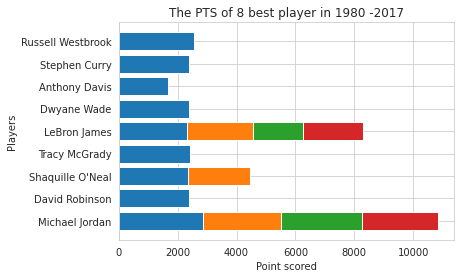

In [32]:
x = list(pts['Player'].unique())

data = np.array([[2868, 2383, 2344, 2407, 2304, 2386, 1656, 2375, 2558],
  [2633, 0, 2125, 0, 2258, 0, 0 , 0 , 0],
  [2753, 0, 0, 0, 1683, 0, 0 , 0 , 0],
  [2580, 0, 0, 0, 2036, 0, 0, 0, 0 ]])

for i in range(data.shape[0]):
  plt.barh(x, data[i],
    left = np.sum(data[:i], axis = 0))

plt.title('The PTS of 8 best player in 1980 -2017')
plt.xlabel('Point scored')
plt.ylabel('Players')
plt.show()

From the datas we learned that the higher the Player Effiency Rating the better they performed in their NBA season. Our team researches has shown that if a PER score of a player is more than 30 which mean in that said year he performed exceptionally well. First of all we decided to look for the total Point that said player scored when their PER rating is higher than 30. However, this chart does not seem to prove anything about what made those player having such high ratings in that season. Instead, looking at the chart we can define that there are two players that has more better years in their career than the rest of the player. Of which we will now change our target into these two players: LeBron James and Michael Jordan.

## Comparision between 2 best players: Michael Jordan vs LeBron James in all of their career


In [40]:
Michael_Jordan = seasons[seasons['Player'] == "Michael Jordan"]
Michael_Jordan['avg_score'] = round(Michael_Jordan['PTS']/Michael_Jordan['G'],2)
Michael_Jordan

,Year,Player,Pos,Age,Tm,G,MP,PER,TS%,ORB%,DRB%,AST%,STL%,BLK%,TOV%,FG%,3P%,2P%,eFG%,FT%,PF,PTS,avg_score
7716,1985,Michael Jordan,SG,21,CHI,82,3144,25.8,59.2,6.3,13.2,25.3,3.0,1.3,13.0,51.5,17.3,52.6,51.8,84.5,285.0,2313,28.21
8469,1987,Michael Jordan,SG,23,CHI,82,3281,29.8,56.2,5.6,9.3,22.2,3.6,2.3,9.1,48.2,18.2,49.1,48.4,85.7,237.0,3041,37.09
8869,1988,Michael Jordan,SG,24,CHI,82,3311,31.7,60.3,4.8,10.7,27.0,3.9,2.4,9.6,53.5,13.2,54.6,53.7,84.1,270.0,2868,34.98
9297,1989,Michael Jordan,SG,25,CHI,81,3255,31.1,61.4,5.5,17.3,34.7,3.6,1.2,11.9,53.8,27.6,55.3,54.6,85.0,247.0,2633,32.51
9747,1990,Michael Jordan,SG,26,CHI,82,3197,31.2,60.6,5.3,15.6,28.6,3.5,1.1,9.8,52.6,37.6,54.8,55.0,84.8,241.0,2753,33.57
10212,1991,Michael Jordan,SG,27,CHI,82,3034,31.6,60.5,4.6,14.3,25.2,3.7,1.7,8.7,53.9,31.2,55.1,54.7,85.1,229.0,2580,31.46
10666,1992,Michael Jordan,SG,28,CHI,80,3102,27.7,57.9,3.5,15.3,25.7,3.0,1.5,8.8,51.9,27.0,53.3,52.6,83.2,201.0,2404,30.05
11106,1993,Michael Jordan,SG,29,CHI,78,3067,29.7,56.4,4.9,15.1,25.2,3.7,1.3,8.4,49.5,35.2,51.4,51.5,83.7,188.0,2541,32.58
12528,1996,Michael Jordan,SG,32,CHI,82,3090,29.4,58.2,5.6,14.9,21.2,3.1,1.0,8.4,49.5,42.7,50.6,52.5,83.4,195.0,2491,30.38
13096,1997,Michael Jordan,SG,33,CHI,82,3106,27.8,56.7,4.2,13.2,21.2,2.4,1.1,7.2,48.6,37.4,50.7,51.6,83.3,156.0,2431,29.65


In [41]:
LeBron_James = seasons[seasons['Player'] == "LeBron James"]
LeBron_James['avg_score'] = round(LeBron_James['PTS']/LeBron_James['G'],2)
LeBron_James

,Year,Player,Pos,Age,Tm,G,MP,PER,TS%,ORB%,DRB%,AST%,STL%,BLK%,TOV%,FG%,3P%,2P%,eFG%,FT%,PF,PTS,avg_score
16746,2004,LeBron James,SG,19,CLE,79,3122,18.3,48.8,3.5,11.8,27.8,2.2,1.3,13.9,41.7,29.0,43.8,43.8,75.4,149.0,1654,20.94
17344,2005,LeBron James,SF,20,CLE,80,3388,25.7,55.4,3.8,17.0,32.9,2.8,1.1,11.8,47.2,35.1,49.9,50.4,75.0,146.0,2175,27.19
17918,2006,LeBron James,SF,21,CLE,79,3361,28.1,56.8,2.6,17.1,32.8,2.0,1.5,10.7,48.0,33.5,51.8,51.5,73.8,181.0,2478,31.37
18460,2007,LeBron James,SF,22,CLE,78,3190,24.5,55.2,3.0,16.6,29.1,2.1,1.3,11.5,47.6,31.9,51.3,50.7,69.8,171.0,2132,27.33
19017,2008,LeBron James,SF,23,CLE,75,3027,29.1,56.8,4.9,17.8,37.3,2.4,2.1,11.4,48.4,31.5,53.1,51.8,71.2,165.0,2250,30.00
19611,2009,LeBron James,SF,24,CLE,81,3054,31.7,59.1,4.3,19.0,38.0,2.4,2.4,11.0,48.9,34.4,53.5,53.0,78.0,139.0,2304,28.44
20207,2010,LeBron James,SF,25,CLE,76,2966,31.1,60.4,3.0,18.5,41.8,2.2,2.0,12.3,50.3,33.3,56.0,54.5,76.7,119.0,2258,29.71
20812,2011,LeBron James,SF,26,MIA,79,3063,27.3,59.4,3.3,18.7,34.9,2.1,1.3,13.8,51.0,33.0,55.2,54.1,75.9,163.0,2111,26.72
21395,2012,LeBron James,SF,27,MIA,62,2326,30.7,60.5,5.0,19.7,33.6,2.6,1.7,13.3,53.1,36.2,55.6,55.4,77.1,96.0,1683,27.15
21933,2013,LeBron James,PF,28,MIA,76,2877,31.6,64.0,4.4,20.8,36.4,2.4,1.9,12.4,56.5,40.6,60.2,60.3,75.3,110.0,2036,26.79


Now that we started to look into these two players, each of them indeed have their own successful and bad years. For Michael Jordan (height 198 cm, weight 88cm), who attended University of North Carolina, started his NBA career in 1985 at 21 years old. His golden time was from 1988-1991 when he play for the Chicago Bulls as Shooting Guard position, pre 1998 he only play as that position for the same team with the lowest rating is from the first and the last year he played for the team. MJ seem to have retired until 2002, he came back and play for the Washington Wizards as Small Forward position. However he seemed to have not succeeded and retired completely after the 2003 season.

For LeBron James (height 198cm, weight 113kg), who did not attend any College or University, started his NBA career playing for the Cleveland Cavaliers as the Shooting Guard position at the year 2004 when he was 19. After a non success year he changed to the Small Forward position, for the next years he continuously gain succeeds and reach his peak performance at the season 2009-2010. His performance then seems to have dwindled by the next year before he switched team to the Miami Heat for the next 4 seasons. With this new team he was able to do well enough as both Small Forward and Power Forward position to have very high PER score at the season 2012-2013. He came back to his former team the Cleveland Cavaliers as his former position at the season 2015-2017 playing with his so-so performance for those seasons. Currently now LJ is still playing basketball. He is now playing for the Los Angeles Lakers up to recently.

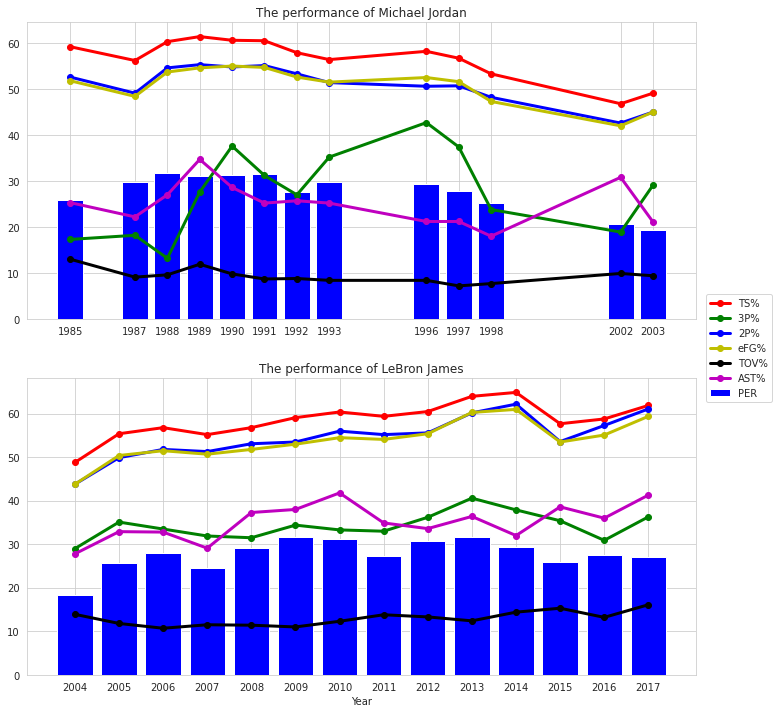

In [98]:
year = Michael_Jordan['Year'].tolist()
PER = Michael_Jordan['PER'].tolist()
TS   = Michael_Jordan['TS%'].tolist()
P3  = Michael_Jordan['3P%'].tolist()
P2 = Michael_Jordan['2P%'].tolist()
eFG = Michael_Jordan['eFG%'].tolist()
TOV  = Michael_Jordan['TOV%'].tolist()
AST = Michael_Jordan ['AST%'].tolist()


yearj = LeBron_James['Year'].tolist()
PERj = LeBron_James['PER'].tolist()
TSj   = LeBron_James['TS%'].tolist()
P3j  = LeBron_James['3P%'].tolist()
P2j = LeBron_James['2P%'].tolist()
eFGj  = LeBron_James['eFG%'].tolist()
TOVj  = LeBron_James['TOV%'].tolist()
ASTj  = LeBron_James ['AST%'].tolist()

fig, axs = plt.subplots(2, figsize = (12,12))

axs[0].plot(year, TS, "ro", label = 'TS%: True Shooting Percentage', linestyle='solid', linewidth =3)
axs[0].plot(year, P3, 'go', label = '3P% Successful rate of a 3 points', linestyle='solid', linewidth =3)
axs[0].plot(year, P2, 'bo', label = '2P%: Successful rate of a 2 points', linestyle='solid',  linewidth =3)
axs[0].plot(year, eFG,'yo', label = 'eFG%: Effective field goal percentage' , linestyle='solid', linewidth =3)
axs[0].plot(year, TOV, 'ko', label = 'TOV%: Turnover Rate' , linestyle='solid', linewidth =3)
axs[0].plot(year, AST, 'mo', label = 'AST%: Assist Rate', linestyle='solid',linewidth =3)
axs[0].set_title('The performance of Michael Jordan')
# axs[0].set_ylabel('Percentage %')
axs[0].set_xticks(year)
axs[0].bar(year, PER, color='blue', label = 'PER')


axs[1].plot(yearj, TSj, "ro", label = 'TS%', linestyle='solid', linewidth =3)
axs[1].plot(yearj, P3j, 'go', label = '3P% ', linestyle='solid', linewidth =3)
axs[1].plot(yearj, P2j, 'bo', label = '2P%', linestyle='solid',  linewidth =3)
axs[1].plot(yearj, eFGj,'yo', label = 'eFG%' , linestyle='solid', linewidth =3)
axs[1].plot(yearj, TOVj, 'ko', label = 'TOV%' , linestyle='solid', linewidth =3)
axs[1].plot(yearj, ASTj, 'mo', label = 'AST%', linestyle='solid',linewidth =3)
axs[1].set_title('The performance of LeBron James')
axs[1].set_xticks(yearj)
axs[1].bar(yearj, PERj, color='blue', label = 'PER')


axs[1].set_xlabel('Year')
# axs[1].set_ylabel('Percentage %')

plt.legend(loc='upper right', bbox_to_anchor=(1.12,1.3))
plt.show()

As we digged deeper into these two player performances in their career the question is still remained: What exactly that make these two players having such high rating in some certain years of their career? In this chart we specifically lay out their stats that could affect their PER score. And yes we did find a pattern here.

### Analyze best seasons ( PER >=30) of each players

In [37]:
Jordan = Michael_Jordan[Michael_Jordan['PER'] >=30]
Jordan

,Year,Player,Pos,Age,Tm,G,MP,PER,TS%,ORB%,DRB%,AST%,STL%,BLK%,TOV%,FG%,3P%,2P%,eFG%,FT%,PF,PTS,avg_score
8869,1988,Michael Jordan,SG,24,CHI,82,3311,31.7,60.3,4.8,10.7,27.0,3.9,2.4,9.6,53.5,13.2,54.6,53.7,84.1,270.0,2868,34.98
9297,1989,Michael Jordan,SG,25,CHI,81,3255,31.1,61.4,5.5,17.3,34.7,3.6,1.2,11.9,53.8,27.6,55.3,54.6,85.0,247.0,2633,32.51
9747,1990,Michael Jordan,SG,26,CHI,82,3197,31.2,60.6,5.3,15.6,28.6,3.5,1.1,9.8,52.6,37.6,54.8,55.0,84.8,241.0,2753,33.57
10212,1991,Michael Jordan,SG,27,CHI,82,3034,31.6,60.5,4.6,14.3,25.2,3.7,1.7,8.7,53.9,31.2,55.1,54.7,85.1,229.0,2580,31.46


In [38]:
James = LeBron_James[LeBron_James['PER'] >=30]
James

,Year,Player,Pos,Age,Tm,G,MP,PER,TS%,ORB%,DRB%,AST%,STL%,BLK%,TOV%,FG%,3P%,2P%,eFG%,FT%,PF,PTS,avg_score
19611,2009,LeBron James,SF,24,CLE,81,3054,31.7,59.1,4.3,19.0,38.0,2.4,2.4,11.0,48.9,34.4,53.5,53.0,78.0,139.0,2304,28.44
20207,2010,LeBron James,SF,25,CLE,76,2966,31.1,60.4,3.0,18.5,41.8,2.2,2.0,12.3,50.3,33.3,56.0,54.5,76.7,119.0,2258,29.71
21395,2012,LeBron James,SF,27,MIA,62,2326,30.7,60.5,5.0,19.7,33.6,2.6,1.7,13.3,53.1,36.2,55.6,55.4,77.1,96.0,1683,27.15
21933,2013,LeBron James,PF,28,MIA,76,2877,31.6,64.0,4.4,20.8,36.4,2.4,1.9,12.4,56.5,40.6,60.2,60.3,75.3,110.0,2036,26.79


We now take the years that each player perform their best to have a closer look.

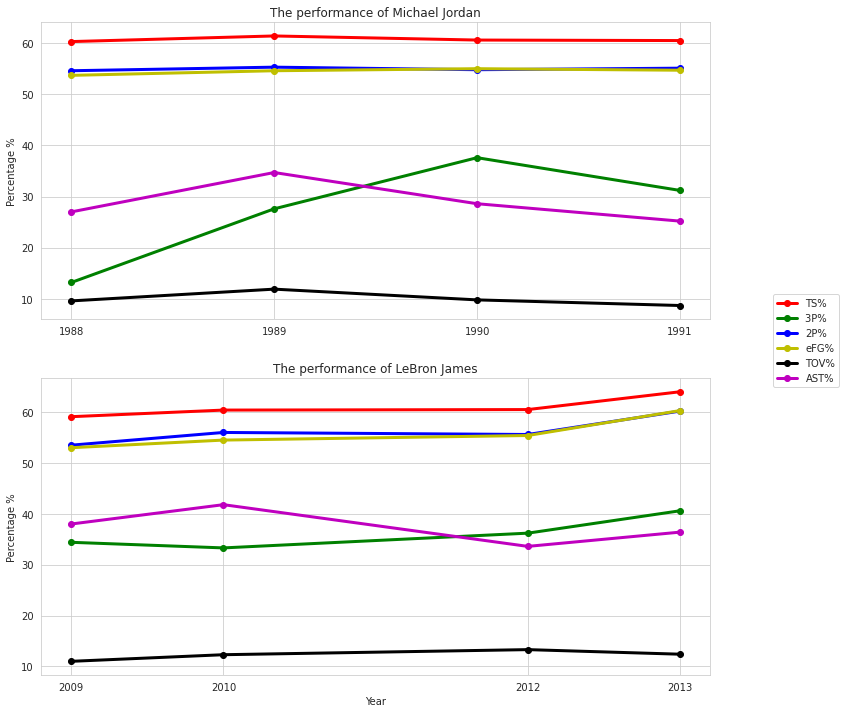

In [91]:
year = Jordan['Year'].tolist()
TS   = Jordan['TS%'].tolist()
P3  = Jordan['3P%'].tolist()
P2 = Jordan['2P%'].tolist()
eFG = Jordan['eFG%'].tolist()
TOV  = Jordan['TOV%'].tolist()
AST = Jordan ['AST%'].tolist()


yearj = James['Year'].tolist()
TSj   = James['TS%'].tolist()
P3j  = James['3P%'].tolist()
P2j = James['2P%'].tolist()
eFGj  = James['eFG%'].tolist()
TOVj  = James['TOV%'].tolist()
ASTj  = James ['AST%'].tolist()

fig, axs = plt.subplots(2, figsize = (12,12))

axs[0].plot(year, TS, "ro", label = 'TS%: True Shooting Percentage', linestyle='solid', linewidth =3)
axs[0].plot(year, P3, 'go', label = '3P% Successful rate of a 3 points', linestyle='solid', linewidth =3)
axs[0].plot(year, P2, 'bo', label = '2P%: Successful rate of a 2 points', linestyle='solid',  linewidth =3)
axs[0].plot(year, eFG,'yo', label = 'eFG%: Effective field goal percentage' , linestyle='solid', linewidth =3)
axs[0].plot(year, TOV, 'ko', label = 'TOV%: Turnover Rate' , linestyle='solid', linewidth =3)
axs[0].plot(year, AST, 'mo', label = 'AST%: Assist Rate', linestyle='solid',linewidth =3)
axs[0].set_title('The performance of Michael Jordan')
axs[0].set_ylabel('Percentage %')
axs[0].set_xticks(year)

axs[1].plot(yearj, TSj, "ro", label = 'TS%', linestyle='solid', linewidth =3)
axs[1].plot(yearj, P3j, 'go', label = '3P% ', linestyle='solid', linewidth =3)
axs[1].plot(yearj, P2j, 'bo', label = '2P%', linestyle='solid',  linewidth =3)
axs[1].plot(yearj, eFGj,'yo', label = 'eFG%' , linestyle='solid', linewidth =3)
axs[1].plot(yearj, TOVj, 'ko', label = 'TOV%' , linestyle='solid', linewidth =3)
axs[1].plot(yearj, ASTj, 'mo', label = 'AST%', linestyle='solid',linewidth =3)
axs[1].set_title('The performance of LeBron James')
axs[1].set_xticks(yearj)

axs[1].set_xlabel('Year')
axs[1].set_ylabel('Percentage %')
plt.legend(loc='upper right', bbox_to_anchor=(1.2,1.3))

plt.show()

After we made this final chart we discover that when a player TS% value reach above 60% that player seem to have his PER score above 30. However LeBron at his 2009 season his TS% score is less than 60%. There is also no abnormalies on his other stat that could have made him to have a higher PER. As research in that specific year he was forced into a temporary positon of the team and yet he is still be able to perform exceptionally which make his team finished with the best record in the NBA league for 2 consecutive seasons.

In conclusion this Data Analysing is still a very new concept to our team and we will continue to become better in this soon hopefully. I hope you all enjoy our presentation and good luck to the rest of the other teams.